<a href="https://colab.research.google.com/github/SireeshaM6/Advanced_House_Dataset/blob/main/ANN_CIFAR10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.layers import Flatten

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
# How to find how many classes are there in the dataset
# It has 10 classes from the documentation

In [ ]:
noOfClasses = len(set(y_train))
print('Number of classes in the CIFAR10: ',noOfClasses)

Number of classes in the CIFAR10:  10


# Conclusions:                                                       
X_train : 50000 images                                                     
X_test  : 10000 images

3 represents : Dataset has colored images

Image size = 32(Height) * 32 (Width)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train[0]

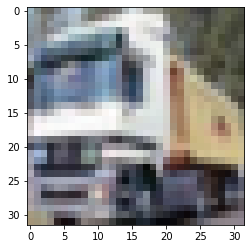

In [ ]:
plt.imshow(x_train[1])
plt.show()

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

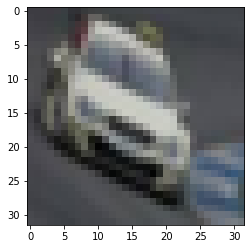

In [ ]:
plt.imshow(x_train[9898])
plt.show()

In [ ]:
y_train[9898][0]

1

In [ ]:
y_train[1][0]

9

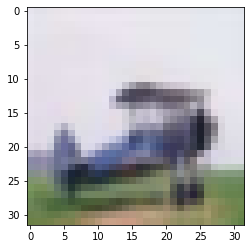

In [ ]:
plt.imshow(x_train[9800],cmap='gray')
plt.show()

In [ ]:
y_train[9890][0]

0

# Scaling of the Dataset

In [ ]:
# Since we can't pass the large values (0-255) to Neural Network, we need to scale. We can do scaling in different ways by centering the values to 0 to 1.
# Now, the x values are between 0 to 1.

x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train[0].shape

(32, 32, 3)

**Model Building**

In [ ]:
# Checking how flatten works

data = Flatten()(x_train)

In [ ]:
data.shape

TensorShape([50000, 3072])

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train[0].shape),
    tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(256,activation='relu'),
     tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(noOfClasses,activation='softmax')

])

In [ ]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
y_train.shape

(50000,)

We will get while the y_train and y_test values to the fit model because of the below reason.

# Also note over here that the targets are 2d array N X 1 instead of N.
# Therefore, we need to flatten them

In [ ]:
y_train,y_test = y_train.flatten(),y_test.flatten()
print(y_train.shape,y_test.shape)

(50000,) (10000,)


In [ ]:
fitted_model = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=30)

Epoch 1/100
1563/1563 [==============================] - 335s 213ms/step - loss: 2.0887 - accuracy: 0.1831 - val_loss: 2.0363 - val_accuracy: 0.1994
Epoch 2/100
1563/1563 [==============================] - 323s 207ms/step - loss: 2.0532 - accuracy: 0.1950 - val_loss: 2.0377 - val_accuracy: 0.1993
Epoch 3/100
1563/1563 [==============================] - 333s 213ms/step - loss: 2.0446 - accuracy: 0.2011 - val_loss: 2.0690 - val_accuracy: 0.1962
Epoch 4/100
1563/1563 [==============================] - 327s 209ms/step - loss: 2.0389 - accuracy: 0.2018 - val_loss: 2.0350 - val_accuracy: 0.2041
Epoch 5/100
1563/1563 [==============================] - 338s 216ms/step - loss: 2.0370 - accuracy: 0.2035 - val_loss: 2.0214 - val_accuracy: 0.2043
Epoch 6/100
1563/1563 [==============================] - 335s 214ms/step - loss: 2.0345 - accuracy: 0.2042 - val_loss: 2.0228 - val_accuracy: 0.2084
Epoch 7/100
1563/1563 [==============================] - 339s 217ms/step - loss: 2.0329 - accuracy: 0.2048